# Results

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import numpy as np
import sys
import scipy.stats
import re
import os
import pandas as pd
import seaborn as sns

In [47]:
sys.path.append('../codes')

In [48]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *
from VMSfunctions.Noise import *

In [49]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'
base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

## A. MS1 Spectra in ToppView

## B. CentWave

Load mzML in peak picking, and see if the same peaks are picked again.

![title](img/placeholder.png)

Boxplot comparing the intensity and number of peaks per scan distributions of MS1 peaks in the simulator vs picked peaks.
- X-axis: samples
- Y-axis: log_2 intensity

In [50]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\extracted_peaks_ms1.csv'))

In [51]:
df['log_intensity'] = df.apply(lambda row: np.log(row['into']), axis=1)

In [52]:
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename,log_intensity
0,185.153705,185.153610,185.153717,3.05013,0.116381,5.58738,31246.861465,30803.377497,6806.964844,8,1,0,1,Beer_multibeers_1_fullscan1.mzML,10.349674
1,222.185283,222.185120,222.185394,1.77138,0.116381,5.58738,51845.186724,51488.390919,14122.940430,20,1,0,1,Beer_multibeers_1_fullscan1.mzML,10.856017
2,246.206421,246.206375,246.206482,1.77138,0.116381,5.58738,51319.567441,51048.598523,16752.429688,32,1,0,1,Beer_multibeers_1_fullscan1.mzML,10.845827
3,232.081600,232.081467,232.081741,4.31951,0.116381,7.04338,34392.652858,34387.111258,8553.839844,8553,1,0,1,Beer_multibeers_1_fullscan1.mzML,10.445598
4,234.123735,234.123566,234.123932,3.05013,0.116381,7.04338,70650.684311,66739.738031,15284.734375,6,1,0,1,Beer_multibeers_1_fullscan1.mzML,11.165503


In [53]:
def make_boxplot(df, x, y, xticklabels, title):
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

In [54]:
df.groupby('filename').median()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,log_intensity
filename,,,,,,,,,,,,,,
Beer_multibeers_10_fullscan1.mzML,259.078668,259.078644,259.078857,472.552000,465.001000,482.640000,2.610378e+06,2.540480e+06,321752.437500,35,2,0,1,14.775006
Beer_multibeers_11_fullscan1.mzML,261.115908,261.115707,261.116074,448.768000,441.026000,459.269000,2.077051e+06,2.015171e+06,247692.054688,33,3,0,1,14.546460
Beer_multibeers_12_fullscan1.mzML,227.158213,227.158066,227.158302,637.590000,630.432500,646.462000,1.052569e+06,9.944424e+05,122891.710938,39,4,0,1,13.866744
Beer_multibeers_13_fullscan1.mzML,274.185449,274.185303,274.185562,512.824000,501.985500,521.608000,2.478946e+06,2.407074e+06,297562.609375,39,5,0,1,14.723344
Beer_multibeers_14_fullscan1.mzML,256.117632,256.117416,256.117874,425.792000,420.839000,432.186000,2.137893e+06,2.070568e+06,264346.359375,35,6,0,1,14.575332
Beer_multibeers_15_fullscan1.mzML,250.083728,250.083511,250.083900,500.577000,493.722000,509.906000,3.702739e+06,3.580059e+06,429392.890625,33,7,0,1,15.124583
Beer_multibeers_16_fullscan1.mzML,254.102035,254.101974,254.102081,478.421000,468.330000,488.381000,3.802149e+06,3.694597e+06,446675.296875,34,8,0,1,15.151077
Beer_multibeers_17_fullscan1.mzML,267.122506,267.122345,267.122650,495.273000,486.469000,505.233000,2.924936e+06,2.842924e+06,348732.500000,32,9,0,1,14.888783
Beer_multibeers_18_fullscan1.mzML,257.198244,257.198029,257.198349,445.711000,437.016000,453.595000,3.458462e+06,3.356371e+06,415484.453125,39,10,0,1,15.056334


In [55]:
rt_range = [(3*60, 21*60)]
df = df[(df['rt'] > rt_range[0][0]) & (df['rt'] < rt_range[0][1])]

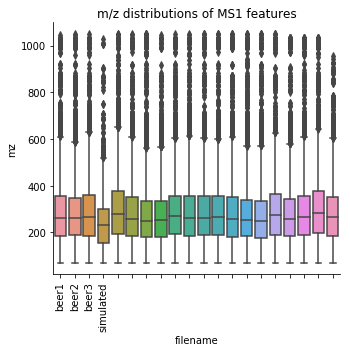

In [58]:
make_boxplot(df, 'filename', 'mz', ['beer1', 'beer2', 'beer3', 'simulated'], 
             'm/z distributions of MS1 features')

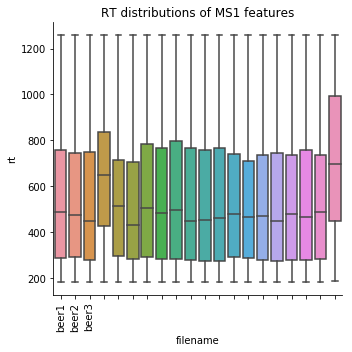

In [59]:
make_boxplot(df, 'filename', 'rt', ['beer1', 'beer2', 'beer3'], 
             'RT distributions of MS1 features')

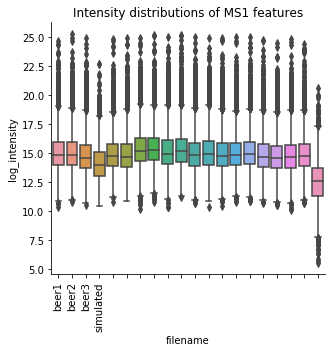

In [60]:
make_boxplot(df, 'filename', 'log_intensity', ['beer1', 'beer2', 'beer3', 'simulated'], 
             'Intensity distributions of MS1 features')

## C. Top-N DDA Fragmentation Compared to the Real Data

Load beer1pos file and run it through DDA controller.
- Boxplot of the number of MS1/MS2 peaks per scan of simulated vs original

In [143]:
def get_df(data_type, filename, ms_level, controller, log=False):
    observed_values = ds.get_data(data_type, filename, ms_level, max_data=1E8)
    
    simulated_values = []    
    if data_type == N_PEAKS:
        simulated_values = [scan.num_peaks for scan in controller.scans[ms_level]]
    elif data_type == RT:
        simulated_values = [scan.rt for scan in controller.scans[ms_level]]        
    elif data_type == MZ:
        for scan in controller.scans[ms_level]:
            if len(scan.mzs) > 0:
                simulated_values.extend(scan.mzs)
    elif data_type == INTENSITY:
        for scan in controller.scans[ms_level]:
            if len(scan.intensities) > 0:
                simulated_values.extend(scan.intensities)        
    simulated_values = np.array(simulated_values)
    
    if log:
        observed_values = np.log(observed_values)
        simulated_values = np.log(simulated_values)

    col1 = np.append(observed_values, simulated_values)
    col2 = np.append(np.array([0] * len(observed_values)), np.array([1] * len(simulated_values)))
    
    col1.astype(np.int)
    col2.astype(np.int)
    
    df = pd.DataFrame(np.stack([col1, col2], axis=1), columns=[data_type, 'filename'])
    return df

In [53]:
mzml_path = os.path.join(base_dir, 'Data\\multibeers_urine_data\\beers\\fragmentation')
ds = DataSource()
ds.load_data(mzml_path)

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_10_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_11_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_12_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_13_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_14_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fragmentation\Beer_multibeers_15_T10_POS.mzML
C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS M

In [64]:
controller = load_obj(os.path.join(base_dir, 'Manuscript\\C. Top-N DDA Fragmentation Compared to the Real Data\\mzML\\experiment_N_10_rttol_15.p'))

In [149]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 1

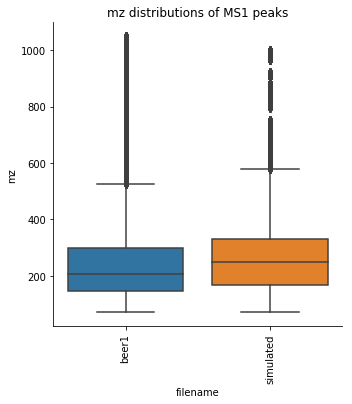

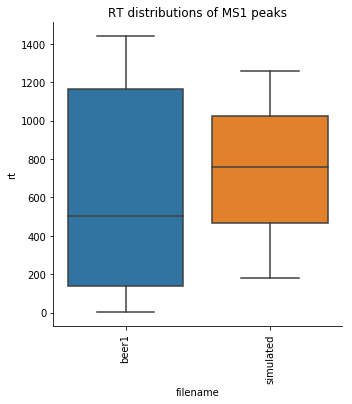

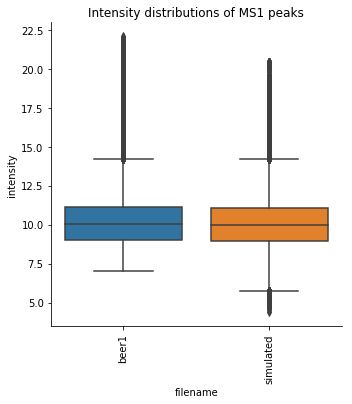

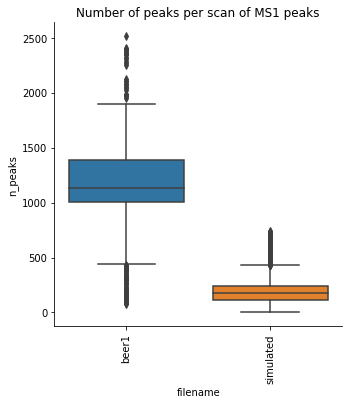

In [151]:
df = get_df(MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

In [152]:
filename = 'Beer_multibeers_1_T10_POS.mzML'
ms_level = 2

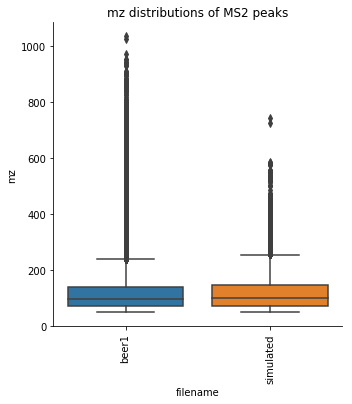

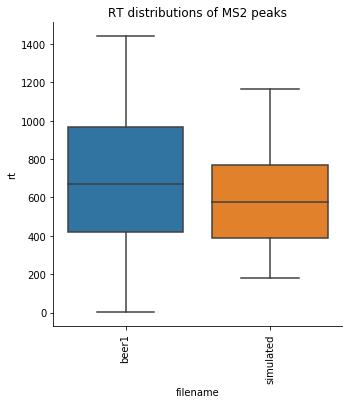

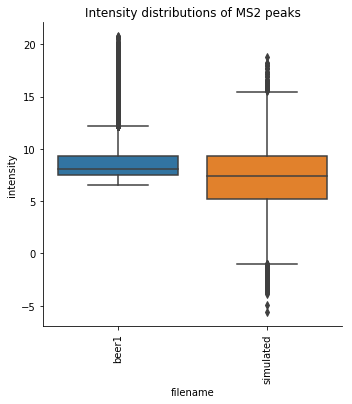

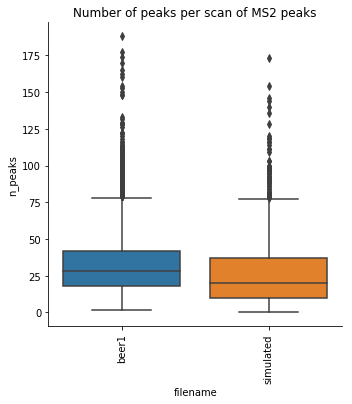

In [153]:
df = get_df(MZ, filename, ms_level, controller)
make_boxplot(df, 'filename', MZ, ['beer1', 'simulated'], 
             'mz distributions of MS%d peaks' % ms_level)

df = get_df(RT, filename, ms_level, controller)
make_boxplot(df, 'filename', RT, ['beer1', 'simulated'], 
             'RT distributions of MS%d peaks' % ms_level)

df = get_df(INTENSITY, filename, ms_level, controller, log=True)
make_boxplot(df, 'filename', INTENSITY, ['beer1', 'simulated'], 
             'Intensity distributions of MS%d peaks' % ms_level)

df = get_df(N_PEAKS, filename, ms_level, controller)
make_boxplot(df, 'filename', 'n_peaks', ['beer1', 'simulated'], 
             'Number of peaks per scan of MS%d peaks' % ms_level)

## D. Case Study 1: Varying N in top-N DDA fragmentation

Vary Ns from the data in C and plot the following for each N:
- Proportion of the original MS1 peaks that were fragmented
- Number of MS2 peaks that map to the original MS1 peak
- 3D plot of various values for Ns vs dynamic exclusion windows?
- Number of MS1 peaks that can be picked by XCMS CentWave

In [234]:
df = pd.read_csv(os.path.join(base_dir, 'Manuscript\\D. Case Study 1 Varying N in top-N DDA fragmentation\\mzML\\extracted_peaks_ms1.csv'))

In [235]:
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,into,intb,maxo,sn,sample,is_filled,msLevel,filename
0,203.955615,203.955566,203.955658,182.883215,180.293011,185.614453,4.470330e+04,4.469798e+04,9330.422852,9329,1,0,1,experiment_N_10_rttol_15.mzML
1,88.112063,88.112045,88.112091,211.932500,194.457195,216.755917,1.513498e+06,1.487857e+06,122235.937500,20,1,0,1,experiment_N_10_rttol_15.mzML
2,88.112063,88.112045,88.112091,186.414965,180.293011,186.502019,4.243501e+05,4.160592e+05,71833.117188,20,1,0,1,experiment_N_10_rttol_15.mzML
3,430.388625,430.388245,430.389435,187.344328,187.262020,192.533277,5.192320e+04,5.191792e+04,17075.250000,17074,1,0,1,experiment_N_10_rttol_15.mzML
4,151.099459,151.099380,151.099564,190.840213,186.177245,195.054898,7.129594e+04,7.128706e+04,11950.869141,11950,1,0,1,experiment_N_10_rttol_15.mzML


In [236]:
df['log_intensity'] = df.apply(lambda row: np.log(row['into']), axis=1)

In [245]:
def make_boxplot(df, x, y, xticklabels, title):
    plt.gcf().set_size_inches(15, 5)
    g = sns.catplot(x=x, y=y,  kind='box', data=df)
    if xticklabels is not None:
        g.set_xticklabels(xticklabels, rotation=90)
    else:
        g.set_xticklabels(rotation=90)        
    plt.title(title)
    plt.tight_layout()

<Figure size 1080x360 with 0 Axes>

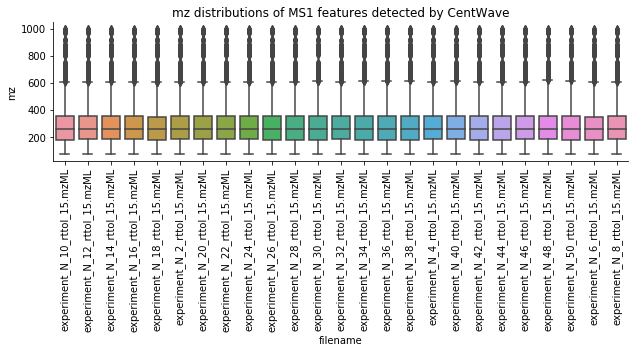

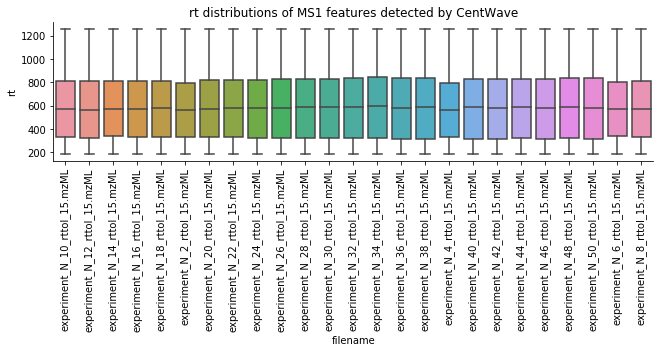

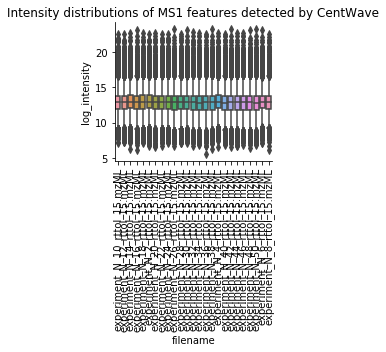

In [246]:
make_boxplot(df, 'filename', 'mz', None, 
             'mz distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'rt', None, 
             'rt distributions of MS1 features detected by CentWave')

make_boxplot(df, 'filename', 'log_intensity', None, 
             'Intensity distributions of MS1 features detected by CentWave')

In [201]:
count_df = df.groupby('filename').size().reset_index(name='counts')

In [202]:
# count_df['N'] = df.apply(lambda row: row.values, axis=1)

In [210]:
arrays = []
for arr in count_df.values:
    N = arr[0].split('_')[2]
    arrays.append((arr[0], N, arr[1]))
arrays = np.array(arrays)

In [218]:
df = pd.DataFrame(arrays, columns=['filename', 'N', 'count'])

In [225]:
df['N'] = df['N'].apply(int)
df['count'] = df['count'].apply(int)

In [228]:
df = df.sort_values('N')

In [229]:
df.head()

,filename,N,count
10,experiment_N_2_rttol_15.mzML,2,9797
21,experiment_N_4_rttol_15.mzML,4,9646
23,experiment_N_6_rttol_15.mzML,6,9841
24,experiment_N_8_rttol_15.mzML,8,9723
0,experiment_N_10_rttol_15.mzML,10,9876


Text(0.5, 1.0, 'Number of MS1 features detected by CentWave')

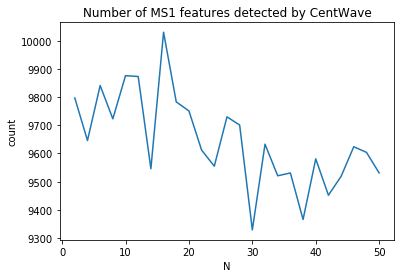

In [232]:
sns.lineplot(x='N', y='count', data=df)
plt.title('Number of MS1 features detected by CentWave')

## E. Case Study 2: Reproduce DIA results

![title](img/placeholder.png)

## F. Case Study 3: Reproduce DsDA results

Same as Table 1 in the DsDA paper:
- The percentage of all detected features that were sampled by MS/MS at least once.
- The percentage of all features detected in at least 20% of the injections that were sampled by MS/MS at least once.
- The total number of MS/MS events (absolute counts) that map to a feature

![title](img/capture1.png)

Same as Figure 1 in the DsDA paper:
- Create 20 samples, run them through DsDA with or without maxdepth.
- Figure 1. *Complex small-molecule sample injected 20 times using standard DDA (A), DsDA (B), or DsDA with the MaxDepth option enabled (C). Each panel contains a scatterplot in which each point represents an XCMS feature. All black points are plotted with sizes proportional to the number of times they were sampled for MS/MS (see legend). All points colored red remained unsampled at the end of the 20-injection sequence*

![title](img/capture2.png)